In [1]:
import os
import sys

current_dir =  os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import torch
import pyro
from collab import foraging_toolkit as ft
import torch.nn.functional as F
import logging
import time

import plotly.io as pio
from plotly import express as px, graph_objects as go, figure_factory as ff
from pyro.nn import PyroModule
import pyro.distributions as dist
from pyro.infer.autoguide import (
    AutoNormal,
    AutoDiagonalNormal,
    AutoMultivariateNormal,
    init_to_mean,
    init_to_value,
)


from pyro.contrib.autoguide import AutoLaplaceApproximation
from pyro.infer import SVI, Trace_ELBO, MCMC, NUTS
from pyro.optim import Adam
import pyro.optim as optim
from pyro.infer import Predictive
from pyro.infer import MCMC, NUTS


In [2]:
ducks_raw = pd.read_csv('../data/central_park_birds_cleaned_2022/20221215122046189_-5_25_bone.avi.hand_checked_cleaned_df.csv')
sparrows_raw = pd.read_csv('../data/central_park_birds_cleaned_2022/20221229124843603_n5_25_bone.avi.hand_checked_cleaned_df.csv')

display(ducks_raw.head())
display(sparrows_raw.head())

print(ducks_raw.shape)
print(sparrows_raw.shape)

,x,y,time,bird
0,84.853396,22.812170,0,1
1,308.485824,22.659691,0,2
2,75.273170,91.047143,0,12
3,68.939135,99.259521,0,17
4,155.181453,109.061447,0,20


,x,y,time,bird
0,294.843352,82.777842,0,2
1,110.659049,86.254356,0,3
2,6.545799,136.260651,0,11
3,294.693470,83.130834,1,2
4,110.614951,86.297426,1,3


(8867, 4)
(22821, 4)


In [3]:
ducks_sub = ft.subsample_frames_evenly_spaced(ducks_raw)
ducks_sub = ft.rescale_to_grid(ducks_sub, 90)

sps_sub = ft.subsample_frames_evenly_spaced(sparrows_raw)
sps_sub = ft.rescale_to_grid(sps_sub, 90)

original_frames: 1450
original_shape: (8867, 4)
resulting_frames: 300
resulting_shape: (1858, 4)
min_time 1
max_time 300
original_frames: 11549
original_shape: (22821, 4)
resulting_frames: 300
resulting_shape: (617, 4)
min_time 1
max_time 300


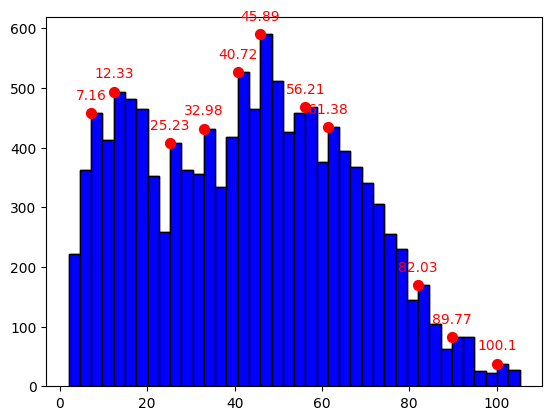

In [4]:
#let's get a feel for the distance distribution of ducks
duck_slices = ft.sample_time_slices(ducks_sub, 1)
duck_distances = ft.birds_to_bird_distances(duck_slices, joint_df = True)
ft.distances_and_peaks(duck_distances)

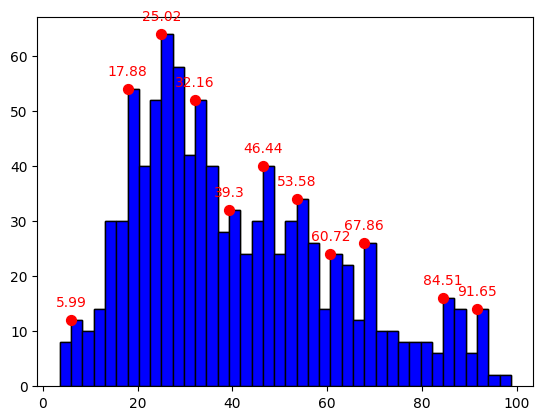

In [6]:
# now sparrows et al.

sps_slices = ft.sample_time_slices(sps_sub, 1)
sps_distances = ft.birds_to_bird_distances(sps_slices, joint_df = True)
ft.distances_and_peaks(sps_distances)